In [44]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV

In [45]:
# Load the dataset
file_path = 'garments_worker_productivity.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [46]:
# Handing the missing value
data['wip'].fillna(data['wip'].median(), inplace=True)

# one-hotting encode
data = pd.get_dummies(data, columns=['quarter', 'department', 'day'])

# Standardizing Numberic Features
scaler = StandardScaler()
numeric_cols = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Spliting the dataset 
X = data.drop(['date', 'actual_productivity'], axis=1)
y = data['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

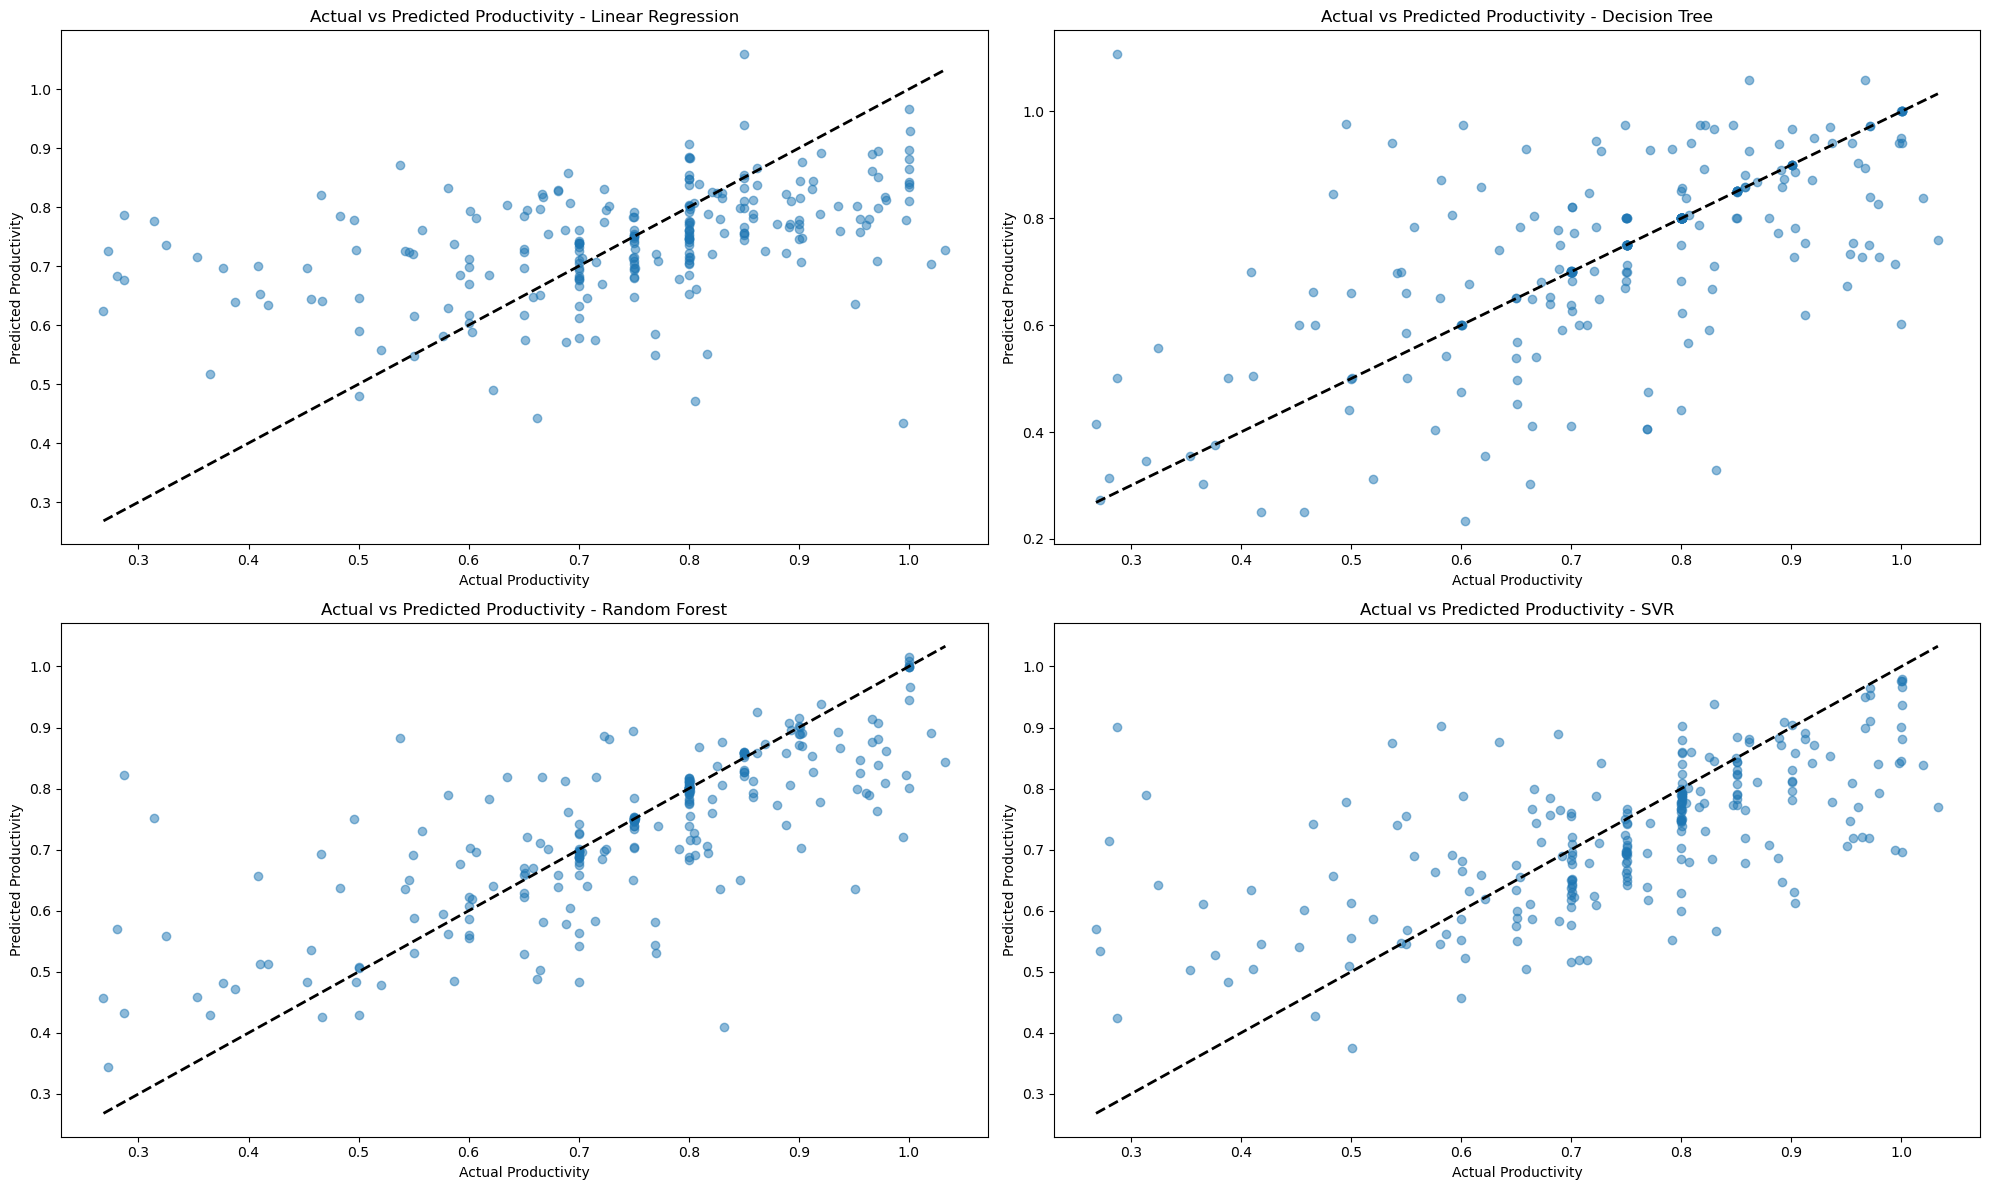

Linear Regression Results:
  RMSE: 0.149
  MAE: 0.108
  R²: 0.168
  Explained Variance: 0.168
  MAPE: 18.257
Decision Tree Results:
  RMSE: 0.147
  MAE: 0.089
  R²: 0.181
  Explained Variance: 0.183
  MAPE: 14.169
Random Forest Results:
  RMSE: 0.109
  MAE: 0.069
  R²: 0.552
  Explained Variance: 0.557
  MAPE: 11.401
SVR Results:
  RMSE: 0.130
  MAE: 0.093
  R²: 0.360
  Explained Variance: 0.376
  MAPE: 15.350


In [51]:
def plot_predictions(y_true, y_pred, model_name, ax):
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    ax.set_xlabel('Actual Productivity')
    ax.set_ylabel('Predicted Productivity')
    ax.set_title(f'Actual vs Predicted Productivity - {model_name}')

# Prepare a 2x2 grid for subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
axs = axs.flatten()  # Flatten the 2x2 matrix of axes into a 1D array for easier access

results = {}
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR']
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Store results
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'Explained Variance': explained_variance, 'MAPE': mape}

    # Plot predictions in designated subplot
    plot_predictions(y_test, y_pred, name, axs[i])

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# Output the metrics results for each model
for model_name, metrics in results.items():
    print(f"{model_name} Results:")
    print(f"  RMSE: {metrics['RMSE']:.3f}")
    print(f"  MAE: {metrics['MAE']:.3f}")
    print(f"  R²: {metrics['R2']:.3f}")
    print(f"  Explained Variance: {metrics['Explained Variance']:.3f}")
    print(f"  MAPE: {metrics['MAPE']:.3f}")


Based on the performance metrics evaluated, the Random Forest model emerges as the superior choice for predicting worker productivity. It has demonstrated the lowest Root Mean Square Error (RMSE) at 0.109 and the lowest Mean Absolute Error (MAE) at 0.069, indicating its predictions are both precise and close to the actual data points. Additionally, it has the highest R² value of 0.552 and an Explained Variance of 0.557, suggesting it can explain more than half of the variance in the dataset, which is significantly higher than the other models tested. The Mean Absolute Percentage Error (MAPE) of 11.401% further confirms its reliability in offering predictions that are closest to true values, making it the most suitable model for this dataset and business needs.

In [54]:
# Randon Forest Model Tuning
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, verbose=1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_forest = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [55]:
# Picking up `best_forest` is the trained Random Forest model for type A
predicted_productivity = best_forest.predict(X_test)
threshold = 70 / 120

# Applying the decision rule
placed_workers = predicted_productivity > threshold

# Evaluate performance: Calculate the potential revenue
potential_revenue = np.sum(predicted_productivity[placed_workers] * 120)
actual_cost = np.sum(placed_workers) * 70

# Profit calculation
profit = potential_revenue - actual_cost
print(f"Potential Revenue: ${potential_revenue:.2f}")
print(f"Total Cost: ${actual_cost:.2f}")
print(f"Profit: ${profit:.2f}")

Potential Revenue: $19010.23
Total Cost: $14350.00
Profit: $4660.23


In [56]:
# Number of workers placed using the model
num_workers_placed_model = np.sum(placed_workers)

# Simulate random placement
np.random.seed(42)  # for reproducibility
random_placements = np.random.choice([True, False], size=len(X_test), p=[num_workers_placed_model/len(X_test), 1 - num_workers_placed_model/len(X_test)])

# Calculate revenue and cost for random placements
random_revenue = np.sum(predicted_productivity[random_placements] * 120)
random_cost = np.sum(random_placements) * 70
random_profit = random_revenue - random_cost

# Compare profits
print(f"Model-driven Profit: ${profit:.2f}")
print(f"Random Placement Profit: ${random_profit:.2f}")

# Assess the added value
added_value = profit - random_profit
print(f"Added Value by Model: ${added_value:.2f}")

Model-driven Profit: $4660.23
Random Placement Profit: $3612.71
Added Value by Model: $1047.53
